# High-level statistical differences between implicit/explicit datasets

In [1]:
# Load data
import os
import pandas as pd

fandoms = [
    'allmarvel',
    'supernatural',
    'harrypotter',
    'dcu',
    'sherlock',
    'teenwolf',
    'starwars',
    'drwho',
    'tolkien',
    'dragonage',
]

all_metadata = {}

# Build combined metadata
for fandom in fandoms:
    metadata_fpath = os.path.join('/data/fanfiction_ao3', fandom, 'complete_en_1k-50k', 'metadata.csv')
    all_metadata[fandom] = pd.read_csv(metadata_fpath)

merged = pd.concat(all_metadata.values(), keys=all_metadata.keys(), names=['dataset', 'old_index'])
metadata = merged.reset_index(level='dataset')
metadata

,dataset,fic_id,title,author,author_key,rating,category,fandom,relationship,character,...,kudos,bookmarks,hits,chapter_count,series,seriespart,seriesid,summary,preface_notes,afterword_notes
old_index,,,,,,,,,,,,,,,,,,,,,
0,allmarvel,1000017,Don't Let Go,helens78,helens78,"[""Teen And Up Audiences""]","[""M/M""]","[""X-Men: First Class (2011) - Fandom""]","[""Erik Lehnsherr/Charles Xavier""]","[""Erik Lehnsherr"", ""Charles Xavier"", ""Kurt Mar...",...,229.0,37.0,2497.0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,allmarvel,1000137,smoke gets in your eyes,hardboiledmeggs,hardboiledmeggs,"[""Teen And Up Audiences""]","[""F/M""]","[""Captain America (Movies)"", ""The Avengers (Ma...","[""Peggy Carter/Howard Stark""]","[""Peggy Carter"", ""Howard Stark"", ""Maria Stark""]",...,143.0,14.0,2204.0,1,smoke gets in your eyes,2.0,64101.0,NaN,NaN,NaN
2,allmarvel,1000153,For You,mrsmischief,mrsmischief,"[""Not Rated""]","[""F/M""]","[""Marvel Cinematic Universe""]","[""Loki/Original Female Character(s)""]","[""Loki (Marvel)"", ""Original Female Character""]",...,51.0,5.0,1596.0,1,NaN,NaN,NaN,NaN,NaN,NaN
3,allmarvel,1000191,Love Makes You Do Stupid Things,CandyassGoth,CandyassGoth,"[""Explicit""]","[""M/M""]","[""The Avengers (Marvel Movies)"", ""The Avengers...","[""Clint Barton/Phil Coulson"", ""Clint Barton/Lo...","[""Phil Coulson"", ""Loki (Marvel)"", ""Clint Barto...",...,119.0,27.0,4166.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,allmarvel,10001978,An Average Day for this Old Man,Angeltigerdragon,Angeltigerdragon,"[""Teen And Up Audiences""]","[""M/M""]","[""Marvel Cinematic Universe"", ""Norse Religion ...","[""Steve Rogers/Tony Stark"", ""Ambiguous or Impl...","[""Thor (Marvel)"", ""Natasha Romanov (Marvel)"", ...",...,18.0,1.0,614.0,1,Normal Steve,2.0,669425.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29837,dragonage,33723,sans peur et sans reproche,cjk1701,cjk1701,"[""Mature""]","[""F/M""]","[""Dragon Age: Origins""]","[""Alistair/Cousland""]","[""Alistair""]",...,42.0,8.0,1132.0,1,NaN,NaN,NaN,"Alistair never became a templar, but he still ...",NaN,NaN
29838,dragonage,33719,A tale of three campsites,cjk1701,cjk1701,"[""Mature""]","[""F/M""]","[""Dragon Age: Origins""]","[""Alistair/Cousland""]","[""Alistair"", ""Cousland""]",...,74.0,13.0,1391.0,1,NaN,NaN,NaN,Alistair tries to come to terms with his Chant...,Very many thanks to the #swoopingisbad crowd f...,NaN
29839,dragonage,103087,Thorn In My Pride,skybound2,skybound2,"[""General Audiences""]","[""F/M"", ""Gen""]","[""Dragon Age"", ""Dragon Age - All Media Types"",...","[""Alistair/Surana""]","[""Female Surana""]",...,6.0,NaN,281.0,1,NaN,NaN,NaN,Neria Surana deals with the personal fallout o...,Warnings : Angst be within. Mage Origin and so...,NaN


## Find fics with explicit and implicit queer identity labels

In [2]:
import re

queer_identity_labels = [
    r'\bqueer\b',
    r'\bgay\b',
    r'\blesbian\b',
    r'\baro\b',
    r'\bace\b',
    r'\btrans\b',
    r'\bbi\b',
    r'\bnonbinary\b',
    r'\bnon-binary\b'
]

queer_relationship_types = [
    'M/M',
    'F/F'
]

explicit_filter = metadata['additional tags'].map(lambda x: any([re.search(w, x.lower()) for w in queer_identity_labels]))
explicit = metadata[explicit_filter]
print(len(explicit))

implicit_filter = metadata['category'].map(lambda x: any([t in x for t in queer_relationship_types])) & [not val for val in explicit_filter.tolist()]
implicit = metadata[implicit_filter]
print(len(implicit))

11401
341277


## What tags are most frequent in each set?

In [5]:
from collections import Counter

explicit_labels = [tag for tags in explicit['additional tags'].map(lambda x: eval(x)).tolist() for tag in tags]
explicit_ctr = Counter(explicit_labels)
explicit_ctr.most_common()

[('Fluff', 2030),
 ('Gay Sex', 1186),
 ('Trans Character', 1158),
 ('Anal Sex', 1059),
 ('Angst', 961),
 ('Trans Male Character', 941),
 ('Gay', 829),
 ('Smut', 813),
 ('Oral Sex', 787),
 ('Romance', 569),
 ('Hurt/Comfort', 547),
 ('Established Relationship', 535),
 ('Coming Out', 514),
 ('Alternate Universe', 510),
 ('First Kiss', 503),
 ('Kissing', 499),
 ('Alternate Universe - Modern Setting', 486),
 ('First Time', 476),
 ('Anal Fingering', 476),
 ('Blow Jobs', 475),
 ('Gay Male Character', 447),
 ('Love', 435),
 ('Fluff and Angst', 428),
 ('Alternate Universe - Canon Divergence', 424),
 ('Friends to Lovers', 411),
 ('Fluff and Smut', 406),
 ('Lesbian Sex', 389),
 ('Plot What Plot/Porn Without Plot', 387),
 ('Humor', 358),
 ('Trans Female Character', 340),
 ('Happy Ending', 329),
 ('Sex', 309),
 ('Masturbation', 309),
 ('Nonbinary Character', 306),
 ('Friendship', 305),
 ('Explicit Sexual Content', 304),
 ('Angst with a Happy Ending', 289),
 ('One Shot', 287),
 ('Emotional Hurt/Comf

In [6]:
implicit_labels = [tag for tags in implicit['additional tags'].map(lambda x: eval(x)).tolist() for tag in tags]
implicit_ctr = Counter(implicit_labels)
implicit_ctr.most_common()

[('Fluff', 50336),
 ('Angst', 35040),
 ('Established Relationship', 19977),
 ('Anal Sex', 19429),
 ('Hurt/Comfort', 19135),
 ('Alternate Universe', 16275),
 ('Romance', 15943),
 ('First Time', 12642),
 ('First Kiss', 12348),
 ('Humor', 12257),
 ('Alternate Universe - Canon Divergence', 11379),
 ('Smut', 10877),
 ('Oral Sex', 9808),
 ('Blow Jobs', 9667),
 ('Plot What Plot/Porn Without Plot', 9083),
 ('Fluff and Angst', 8733),
 ('Anal Fingering', 8281),
 ('Alternate Universe - Modern Setting', 8234),
 ('Rimming', 7581),
 ('Emotional Hurt/Comfort', 7558),
 ('Angst with a Happy Ending', 6831),
 ('Kissing', 6639),
 ('Dirty Talk', 6316),
 ('Pining', 6091),
 ('Happy Ending', 6008),
 ('Masturbation', 5812),
 ('Friends to Lovers', 5733),
 ('Hand Jobs', 5656),
 ('AU', 5629),
 ('Slash', 5450),
 ('Alpha/Beta/Omega Dynamics', 5419),
 ('Sexual Content', 5329),
 ('Pre-Slash', 5206),
 ('Fluff and Smut', 5202),
 ('One Shot', 5127),
 ('Explicit Sexual Content', 5073),
 ('PWP', 5023),
 ('Mpreg', 4983),
 

## Relationship type distributions in each dataset

In [4]:
from collections import Counter

# Overall
relationship_list = [reltype for types in metadata['category'].map(lambda x: eval(x)).tolist() for reltype in types]
relationship_ctr = Counter(relationship_list)
type_proportions = {}
type_proportions['all'] = [(reltype, n_fics, n_fics/len(metadata)) for (reltype, n_fics) in relationship_ctr.most_common()]
type_proportions['all']

[('M/M', 320025, 0.509716508268708),
 ('F/M', 174629, 0.2781385333097608),
 ('Gen', 122543, 0.1951790956105688),
 ('F/F', 36552, 0.05821781988981427),
 ('Multi', 25884, 0.0412264732443629),
 ('Other', 10555, 0.016811367064373757),
 ('M/F - Category', 41, 6.530232587771901e-05)]

In [5]:
# Explicit
relationship_list = [reltype for types in explicit['category'].map(lambda x: eval(x)).tolist() for reltype in types]
relationship_ctr = Counter(relationship_list)
type_proportions['explicit'] = [(reltype, n_fics, n_fics/len(explicit)) for (reltype, n_fics) in relationship_ctr.most_common()]
type_proportions['explicit']

[('M/M', 7513, 0.6589772826945005),
 ('F/F', 2385, 0.20919217612490132),
 ('F/M', 1706, 0.14963599684238224),
 ('Gen', 1311, 0.1149899131655118),
 ('Multi', 796, 0.06981843697921235),
 ('Other', 542, 0.047539689500920974)]

In [6]:
# Implicit
relationship_list = [reltype for types in implicit['category'].map(lambda x: eval(x)).tolist() for reltype in types]
relationship_ctr = Counter(relationship_list)
type_proportions['implicit'] = [(reltype, n_fics, n_fics/len(implicit)) for (reltype, n_fics) in relationship_ctr.most_common()]
type_proportions['implicit']

[('M/M', 312512, 0.9157136285187693),
 ('F/F', 34167, 0.10011515572394272),
 ('F/M', 31541, 0.09242052643453852),
 ('Gen', 18736, 0.05489968559264175),
 ('Multi', 12298, 0.036035244097902874),
 ('Other', 3269, 0.009578729302003944),
 ('M/F - Category', 40, 0.00011720684370760408)]

In [10]:
types_df = pd.DataFrame()
for corpus in type_proportions:
    type_df = pd.DataFrame(type_proportions[corpus], columns=['relationship_type', 'number_of_stories', 'proportion_of_corpus'])
    type_df['corpus'] = [corpus] * len(type_df)
    types_df = pd.concat([types_df, type_df])
types_df

,relationship_type,number_of_stories,proportion_of_corpus,corpus
0,M/M,320025,0.509717,all
1,F/M,174629,0.278139,all
2,Gen,122543,0.195179,all
3,F/F,36552,0.058218,all
4,Multi,25884,0.041226,all
5,Other,10555,0.016811,all
6,M/F - Category,41,0.000065,all
0,M/M,7513,0.658977,explicit
1,F/F,2385,0.209192,explicit
2,F/M,1706,0.149636,explicit


No handles with labels found to put in legend.


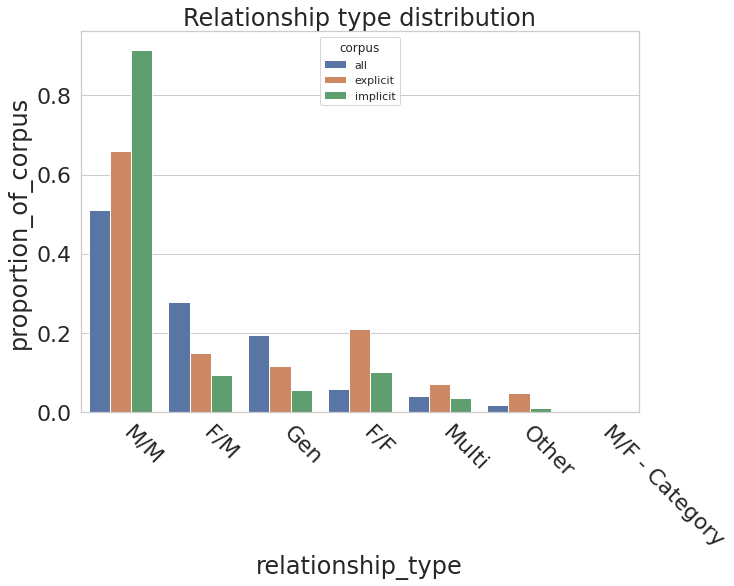

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# sns.set_style('whitegrid', {'font.size': 10})
sns.set_context('notebook', font_scale=2)

plt.figure(figsize=(10,7))
plt.title("Relationship type distribution")
plt.ylabel('proportion of corpus')
plt.xlabel('relationship type')
plt.xticks(rotation=-45, ha='left')
plt.legend(loc='upper right', bbox_to_anchor=((1.3, 1)))

sns.set(style='whitegrid')
sns.barplot(x='relationship_type', y='proportion_of_corpus', hue='corpus', data=types_df)

## Fandom distributions in each dataset

In [39]:
# Overall
fandom_list = metadata['dataset'].tolist()
fandom_ctr = Counter(fandom_list)
fandom_proportions = {}
fandom_proportions['all'] = [(fandom, n_fics, n_fics/len(metadata)) for (fandom, n_fics) in fandom_ctr.most_common()]
fandom_proportions['all']

[('allmarvel', 130001, 0.20705774796169144),
 ('supernatural', 102802, 0.16373682207027485),
 ('harrypotter', 84150, 0.13402904201487936),
 ('dcu', 67064, 0.10681549226008165),
 ('sherlock', 56852, 0.09055043489756295),
 ('teenwolf', 53075, 0.08453465721853504),
 ('starwars', 42603, 0.06785548754557226),
 ('drwho', 33072, 0.05267508588848593),
 ('dragonage', 29842, 0.04753053680104611),
 ('tolkien', 28388, 0.04521469334187042)]

In [40]:
# Explicit
fandom_list = explicit['dataset'].tolist()
fandom_ctr = Counter(fandom_list)
fandom_proportions['explicit'] = [(fandom, n_fics, n_fics/len(explicit)) for (fandom, n_fics) in fandom_ctr.most_common()]
fandom_proportions['explicit']

[('allmarvel', 2460, 0.21577054644329444),
 ('supernatural', 1822, 0.15981054293483027),
 ('dcu', 1586, 0.13911060433295325),
 ('harrypotter', 1490, 0.13069029032541005),
 ('starwars', 1019, 0.08937812472590123),
 ('sherlock', 932, 0.08174721515656522),
 ('teenwolf', 776, 0.06806420489430752),
 ('dragonage', 618, 0.05420577142355934),
 ('drwho', 358, 0.03140075431979651),
 ('tolkien', 340, 0.02982194544338216)]

In [41]:
# Implicit
fandom_list = implicit['dataset'].tolist()
fandom_ctr = Counter(fandom_list)
fandom_proportions['implicit'] = [(fandom, n_fics, n_fics/len(implicit)) for (fandom, n_fics) in fandom_ctr.most_common()]
fandom_proportions['implicit']

[('allmarvel', 66531, 0.19494721296776518),
 ('supernatural', 66171, 0.19389235137439675),
 ('harrypotter', 42597, 0.12481649803532029),
 ('teenwolf', 40871, 0.11975902272933717),
 ('dcu', 35869, 0.10510230692370127),
 ('sherlock', 35817, 0.10494993802688139),
 ('starwars', 18046, 0.052877867538685584),
 ('tolkien', 14135, 0.041417968395174594),
 ('dragonage', 11379, 0.03334241686372067),
 ('drwho', 9861, 0.028894417145017098)]

In [42]:
fandoms_df = pd.DataFrame()
for corpus in fandom_proportions:
    fandom_df = pd.DataFrame(fandom_proportions[corpus], columns=['fandom', 'number_of_stories', 'proportion_of_corpus'])
    fandom_df['corpus'] = [corpus] * len(fandom_df)
    fandoms_df = pd.concat([fandoms_df, fandom_df])
fandoms_df

,fandom,number_of_stories,proportion_of_corpus,corpus
0,allmarvel,130001,0.207058,all
1,supernatural,102802,0.163737,all
2,harrypotter,84150,0.134029,all
3,dcu,67064,0.106815,all
4,sherlock,56852,0.090550,all
5,teenwolf,53075,0.084535,all
6,starwars,42603,0.067855,all
7,drwho,33072,0.052675,all
8,dragonage,29842,0.047531,all
9,tolkien,28388,0.045215,all


No handles with labels found to put in legend.


Text(0.5, 0, 'relationship type')

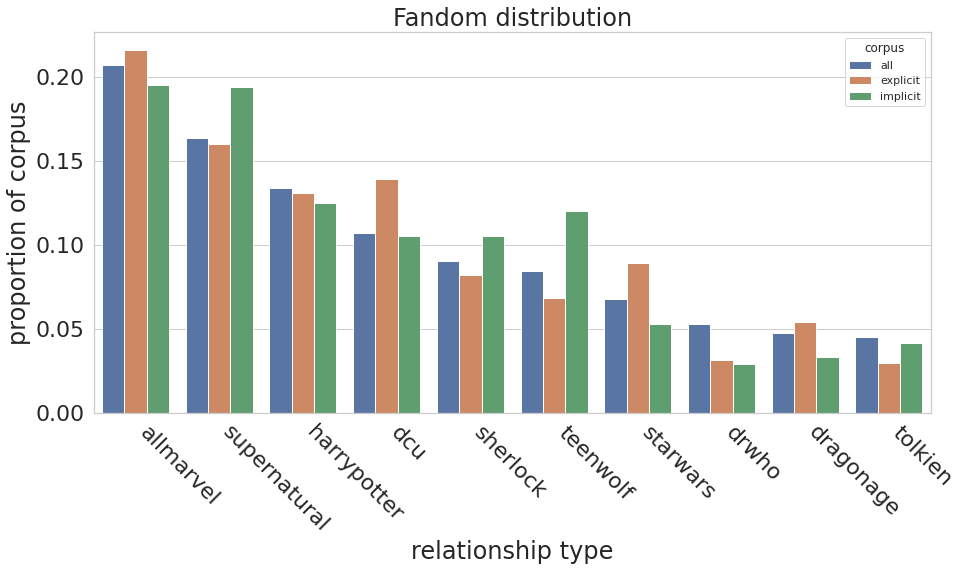

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

sns.set_context('notebook', font_scale=2)

plt.figure(figsize=(15,7))
plt.title("Fandom distribution")
plt.xticks(rotation=-45, ha='left')
plt.legend(loc='upper right', bbox_to_anchor=((1.3, 1)))

sns.set(style='whitegrid')
sns.barplot(x='fandom', y='proportion_of_corpus', hue='corpus', data=fandoms_df)
plt.ylabel('proportion of corpus')
plt.xlabel('relationship type')

## Find fics with specific qualities

In [40]:
# Find fluff F/M fic
selected = filtered[(filtered['category'].map(lambda x: 'F/M' in x)) & (filtered['additional tags'].map(lambda x: 'Fluff' in x))]
selected.sample(10)

,fic_id,title,author,author_key,rating,category,fandom,relationship,character,additional tags,...,kudos,bookmarks,hits,chapter_count,series,seriespart,seriesid,summary,preface_notes,afterword_notes
1547,1081185,"A Healer, a Warrior, a Wise Man, Bespoken",Starjargon,Starjargon,"[""Teen And Up Audiences""]","[""F/M""]","[""Doctor Who (2005)"", ""Doctor Who"", ""Doctor Who & Related Fandoms""]","[""The Doctor/River Song"", ""Eleventh Doctor/River Song""]","[""The War Doctor (Doctor Who)"", ""Clara Oswin Oswald"", ""Tenth Doctor"", ""Eleventh Doctor"", ""River Song""]","[""Fluff"", ""Humor"", ""Doctor Who 50th Anniversary"", ""Spoilers"", ""Jealousy"", ""Timey Wimey fun"", ""Every Doctor is fair game"", ""episode insert"", ""Day of the Doctor insert""]",...,66.0,10.0,1085.0,1,NaN,NaN,NaN,"The Doctors started something long ago, but how did they know it needed starting? They need someone they can trust to spread the word. Luckily, someone pops by who can't wait to see all of them... again. Fluff. Rated T for suggestiveness. Major spoilers for 50th. One- shot.",A/N- just a bit of silly fluff I thought of while wondering about something in the 50th (major spoiler alert). All quotes belong to Steven Moffat and the BBC. Please review.,NaN
27569,609265,Nothing Like The Sun,suilven,suilven,"[""General Audiences""]","[""F/M""]","[""Dragon Age""]","[""Zevran Arainai/Female Surana""]","[""Zevran Arainai"", ""Dog (Dragon Age)"", ""Female Surana""]","[""Romance"", ""Fluff"", ""Humor""]",...,48.0,9.0,852.0,1,NaN,NaN,NaN,"Zevran ponders the mysteries of Neria's charms, with a little help from Dog. A heart-warming little tale of blossoming romance.",NaN,"Written for the amazingly talented and lovely xseikax for the CMDA Secret Santa Fic Exchange. Please go check out some of her wonderful stories on FFNet or her incredible artwork on deviantArt (LadySeika over there). She's one of the nicest people I've been lucky enough to meet in this fandom, and it was a pleasure to write this for her."
20467,10649043,It Took Pergitor,AlbertFinestein,AlbertFinestein,"[""General Audiences""]","[""F/M""]","[""Star Wars Episode VII: The Force Awakens (2015)""]","[""Poe Dameron/Reader"", ""Poe Dameron/You""]","[""Poe Dameron"", ""Female Reader Insert - Character"", ""General Organa (mention only)"", ""Various Star Wars species - Character""]","[""Fluff"", ""FLLLLLLUFFFFFFFFFF"", ""Actually based on a dream I had"", ""the more you know"", ""also there is fluff"", ""and Poe being seductive""]",...,38.0,1.0,859.0,1,NaN,NaN,NaN,"Poe and Reader are Resistance Partners, sent on an important mission to retrieve vital data for the resistance on a Mining Planet with a black market.\nAnd you have just realized that I am crap at summaries.",NaN,"Hey Yo, so instead of finishing my other fanfic, I decided to write a one shot. GO ME!!\nAnyway I hope you all enjoy :)"
10644,13671603,Crystal,rosalynbair,rosalynbair,"[""Not Rated""]","[""F/M""]","[""Star Wars Episode VII: The Force Awakens (2015)"", ""Star Wars - All Media Types""]","[""Kylo Ren/Reader"", ""Ben Solo/Reader"", ""Kylo Ren/You"", ""Ben Solo/You""]","[""Ben Solo | Kylo Ren"", ""Ben Solo"", ""Kylo Ren"", ""Stormtrooper Character(s)"", ""Daughter""]","[""Fluff"", ""Children"", ""infant"", ""slightly dysfunctional marriage""]",...,25.0,2.0,453.0,1,NaN,NaN,NaN,Request: Hey I would like a oneshot in which you kylo and your daughter (Crystal) are going to spend a weekend in Naboo and when they come back she ends up getting sick and rather cranky not wanting to leave the arms of her father. (You try to grab her in the arms but she hides in Kylo's neck).,NaN,NaN
107227,6939259,A Brooklyn christmas,HisAsgardianAngel,HisAsgardianAngel,"[""Not Rated""]","[""F/M""]","[""Captain America (Movies)""]","[""James \""Bucky\"" Barnes/Original Female Character(s)"", ""Steve Rogers & Original Female Character(s)""]","[""James \""Bucky\"" Barnes"", ""Steve Rogers"", ""Original Female Character(s)""]","[""Christmas"", ""Sorta reader"", ""Pr

In [41]:
# Find Tolkien F/F fic
selected = filtered[(filtered['category'].map(lambda x: 'F/F' in x)) & (filtered['fandom'].map(lambda x: 'tolkien' in x.lower()))]
selected.sample(10)

,fic_id,title,author,author_key,rating,category,fandom,relationship,character,additional tags,...,kudos,bookmarks,hits,chapter_count,series,seriespart,seriesid,summary,preface_notes,afterword_notes
26680,171538,Come Back to Me I,Marta,Marta,"[""Mature""]","[""F/F""]","[""Lord of the Rings (2001 2002 2003)"", ""Lord of the Rings - J. R. R. Tolkien"", ""The Silmarillion - J. R. R. Tolkien""]","[""Fimbrethil/Goldberry""]","[""Fimbrethil"", ""Goldberry""]","[""Femslash"", ""Minor Character(s)""]",...,20.0,2.0,252.0,2,NaN,NaN,NaN,"As the third age rolls on, an entwife meets a certain river-daughter.","ENT. When Spring unfolds the beech leaf, and sap is in the bough\nWhen light is on the wild-wood stream, and wind is on the brow;\nWhen stride is long, and breath is deep, and keen the mountain-air,\nCome back to me! Come back to me, and say my land is fair!\nENTWIFE. When Spring is come to garth and field, and corn is in the blade;\nWhen blossom like a shining snow is on the orchard laid;\nWhen shower and Sun upon the Earth with fragrance fill the air,\nI'll linger here, and will not come, because my land is fair.\n(from ""Treebeard"", The Two Towers )","ENT. When Winter comes, the winter wild that hill and wood shall slay;\nWhen trees shall fall and starless night devour the sunless day;\nWhen wind is in the deadly East, then in the bitter rain\nI'll look for thee, and call to thee; I'll come to thee again.\nENTWIFE. When Winter comes, and singing ends; when darkness falls at last;\nWhen broken is the barren bough, and light and labour past;\nI'll look for thee, and wait for thee, until we meet again:\nTogether we will take the road beneath the bitter rain!\n(from ""Treebeard"", The Two Towers )"
14481,3326150,nothing but recovery,shuofthewind,shuofthewind,"[""Not Rated""]","[""F/F"", ""F/M"", ""Multi""]","[""The Hobbit - All Media Types"", ""The Hobbit (Jackson Movies)"", ""The Hobbit - J. R. R. Tolkien""]","[""K\u00edli/Tauriel"", ""Bilbo Baggins/K\u00edli"", ""Bilbo Baggins/Tauriel"", ""K\u00edli/Bilbo Baggins/Tauriel""]","[""Bilbo Baggins"", ""K\u00edli"", ""Tauriel"", ""Bofur"", ""Bofur's Hat"", ""Dori (Mentioned)"", ""Bard of Laketown (mentioned)"", ""Sigrid (Hobbit movies) (mentioned)""]","[""Female Bilbo"", ""Alternate Universe - Always a Different Sex"", ""Alternate Universe - Canon Divergence"", ""Alternate Universe - Everyone Lives/Nobody Dies"", ""Fluff"", ""Canon-Typical Violence"", ""Sickfic"", ""prompt"", ""Polyamory"", ""Polyfidelity"", ""Bechdel Test Pass""]",...,189.0,14.0,2949.0,1,Le Monde Solaire,3.0,208712.0,"Blue is not a good sick person. Kíli and Tauriel make up for it. Prompted by lazytologin.\n[Blue’s head rocks against Tauriel’s collarbone like a child’s would. All of a sudden, she’s too tired to particularly care. “If you bite him, you will pass on the sickness, and I’m fairly sure that he would be an even worse patient than you, aew, a’maelamin.”\n“Not fair,” Blue mumbles, tucking her nose into her scarf. Her hair is tangled and almost black with how dirty it is. “Two against one.”\n“No,” says Kíli at the same time. “She’s worse than me.”]","A prompt from lazytologin that caught fire in my brain. A little different from the prompt itself, but...I mean, it ended up int eh same place, so I hope it's okay?\nPrompt: The three of them are floating along, happy as can be, when Blue gets sick. Not “I’m going to die” sick, but enough that she has a head-cold and shivers all the time, prompting Kíli and Tauriel to go from 0 to 60 real quick with concern. Blue is flattered but also just wants to go to bed with a lover on each side.\nTriggers for: drowning, some really nasty, infected blisters, battlefield first-aid, and gigantic mites. Tread with caution if these aren't your cup of tea.\nUnbeta'ed!",NaN
14538,3308639,Constraints,ncfan,ncfan,"[""Teen And Up Audiences""]","[""F/F""]","[""TOLKIEN J. R. R. - Works"", ""The Silmarillion and other histories of Middle-Earth - J. R. R. Tolkien""]","[""Lindiss\u00eb/Silmar